In [77]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

In [36]:
train_path = r'D:\university\Thesis\final\Flower kath golap\1training'
test_path = r'D:\university\Thesis\final\Flower kath golap\2testing'
val_path = r'D:\university\Thesis\final\Flower kath golap\3vali'

Bloom


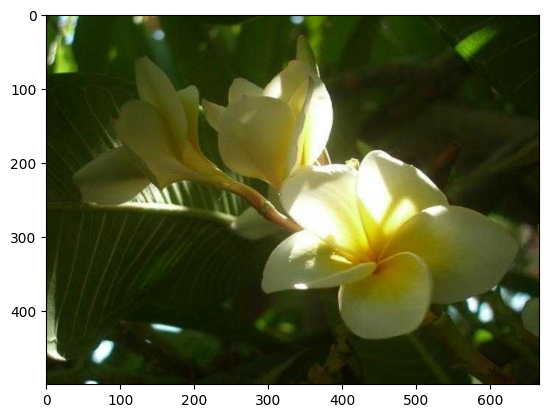

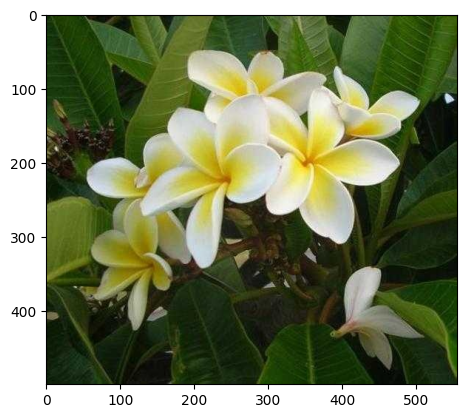

Post Bloom


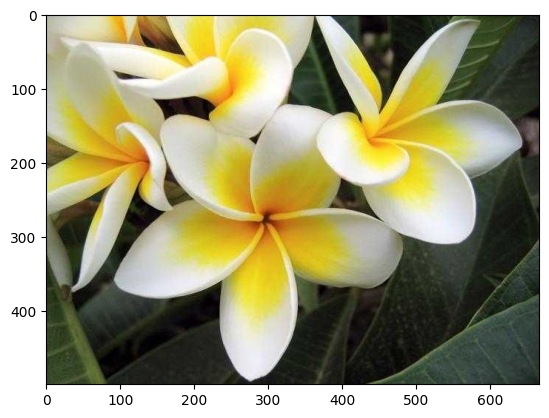

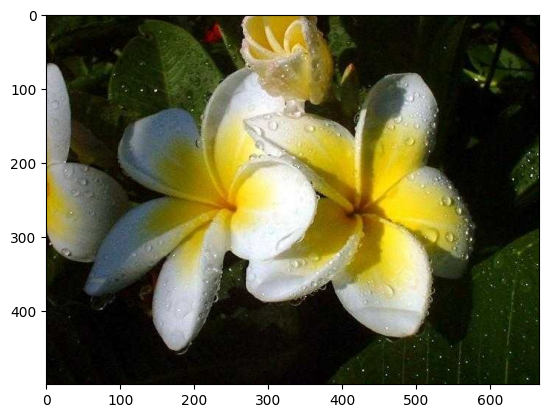

Pre Bloom


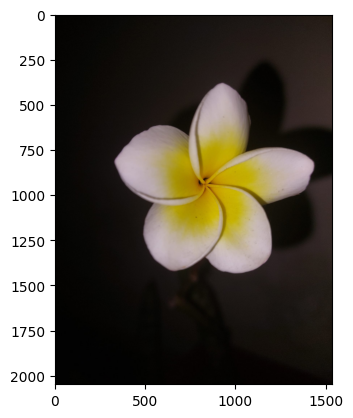

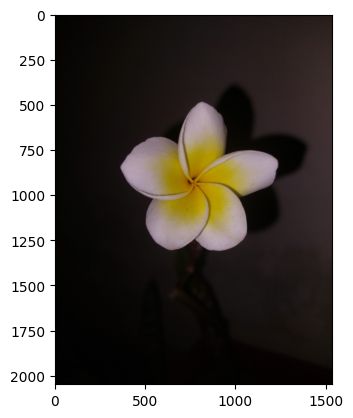

In [37]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [38]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [41]:
size = (250,250)

In [42]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [43]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [44]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [45]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [46]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 1170 images belonging to 3 classes.
Found 325 images belonging to 3 classes.
Found 210 images belonging to 3 classes.


In [47]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [48]:
train_class.class_indices

{'Bloom': 0, 'Post Bloom': 1, 'Pre Bloom': 2}

In [49]:
y_train.shape,y_test.shape,y_val.shape

((1170,), (325,), (210,))

In [97]:
#x2
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(25, activation = 'softmax'))

In [98]:
cnn=model3

In [100]:
for layer in cnn.layers:
    layer.trainable = False

x = Flatten()(cnn.output)
prediction = Dense(3, activation='softmax')(x)

model3 = Model(inputs=cnn.input, outputs=prediction)
model3.summary()



Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0   

In [103]:
#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
#model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
#model3.summary()
model3.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [104]:
#Training the CNN model1
#history = model3.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
#history3 = model3.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

history3 = model3.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10,batch_size = 30,shuffle=True)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\faysa\anaconda3\envs\tenserflow_cpu\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\faysa\anaconda3\envs\tenserflow_cpu\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\faysa\anaconda3\envs\tenserflow_cpu\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\faysa\anaconda3\envs\tenserflow_cpu\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\faysa\anaconda3\envs\tenserflow_cpu\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\faysa\anaconda3\envs\tenserflow_cpu\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_6" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(30, 250, 250, 3)


In [50]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

In [51]:
#x
vgg2 = VGG16(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False) 

In [52]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

model1 = Model(inputs=vgg.input, outputs=prediction)
model1.summary()



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [53]:
#x
for layer in vgg2.layers:
    layer.trainable = False

x = Flatten()(vgg2.output)
prediction = Dense(3, activation='softmax')(x)

model2 = Model(inputs=vgg2.input, outputs=prediction)
model2.summary()



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [54]:
model1.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

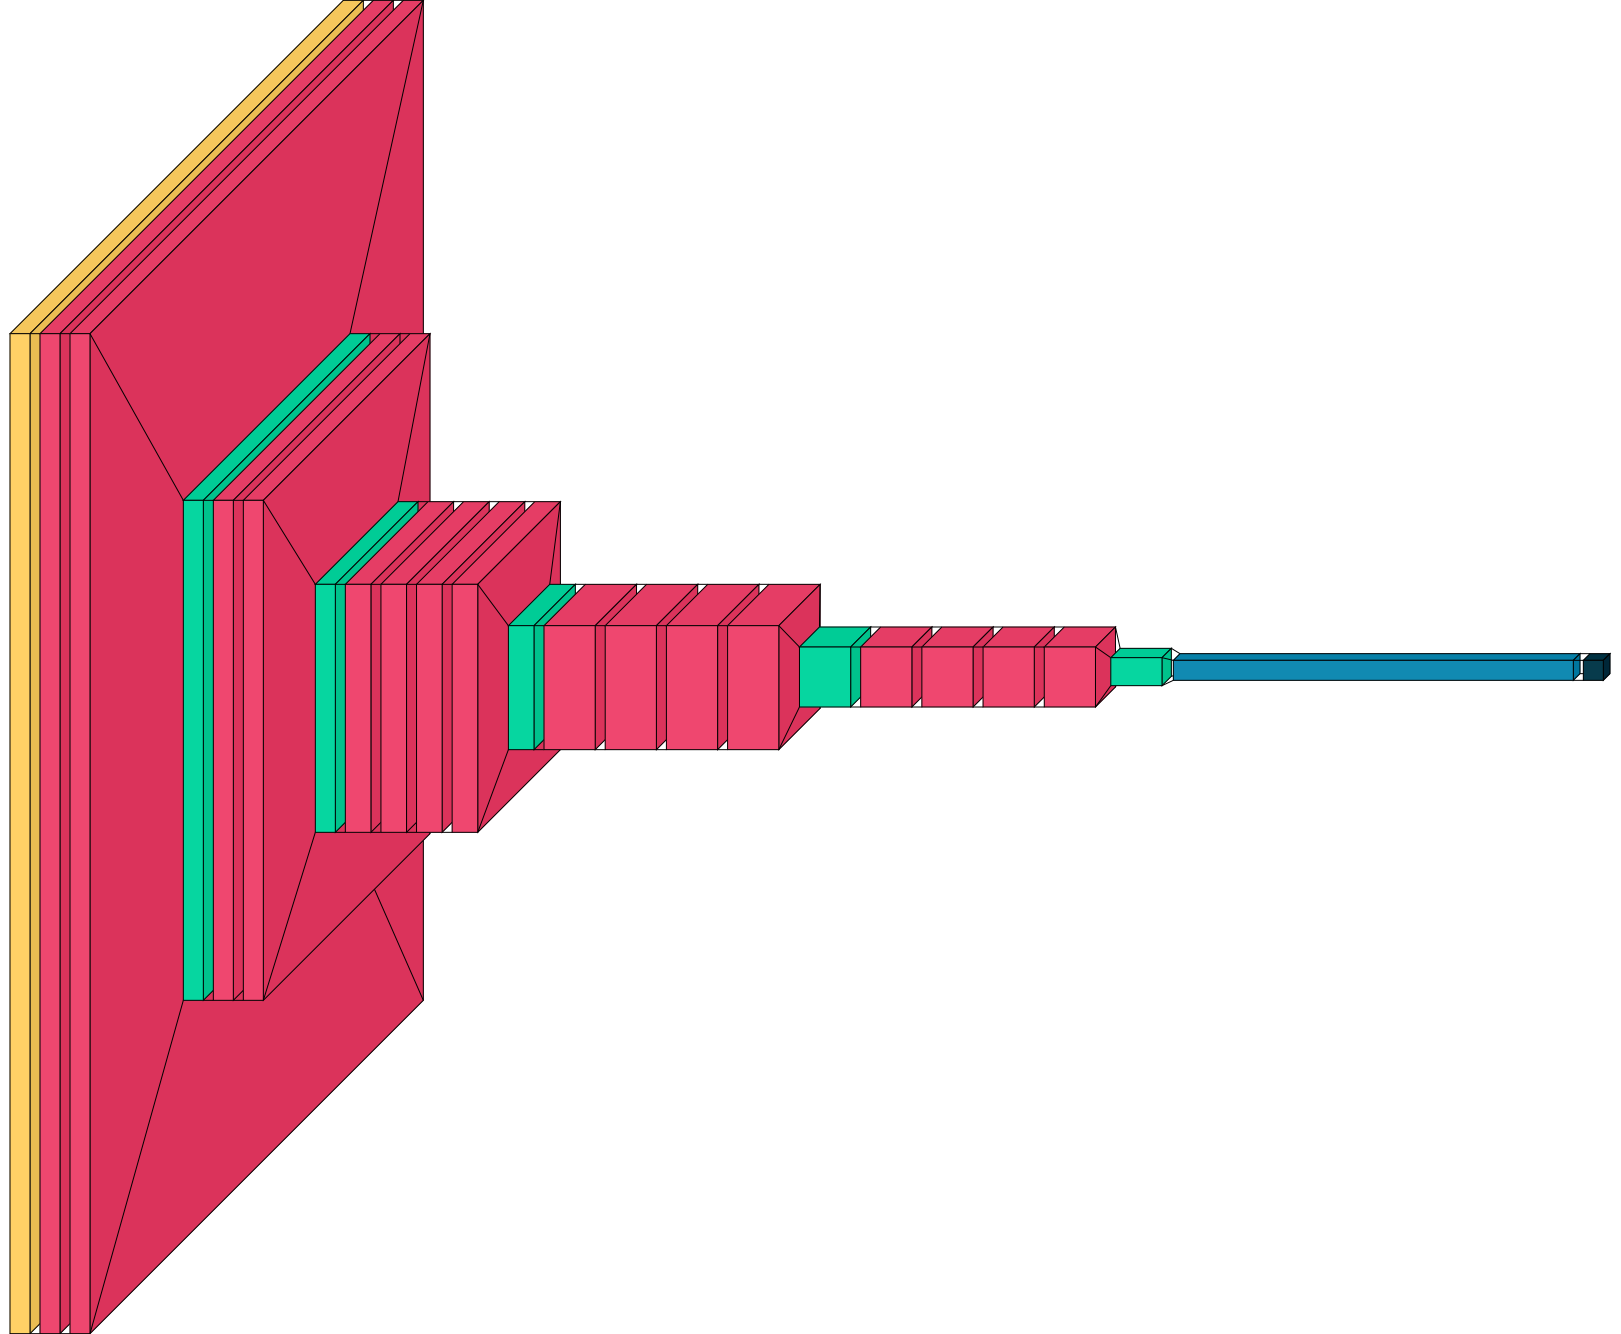

In [69]:
import visualkeras
visualkeras.layered_view(model1)

In [55]:
#x
model2.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

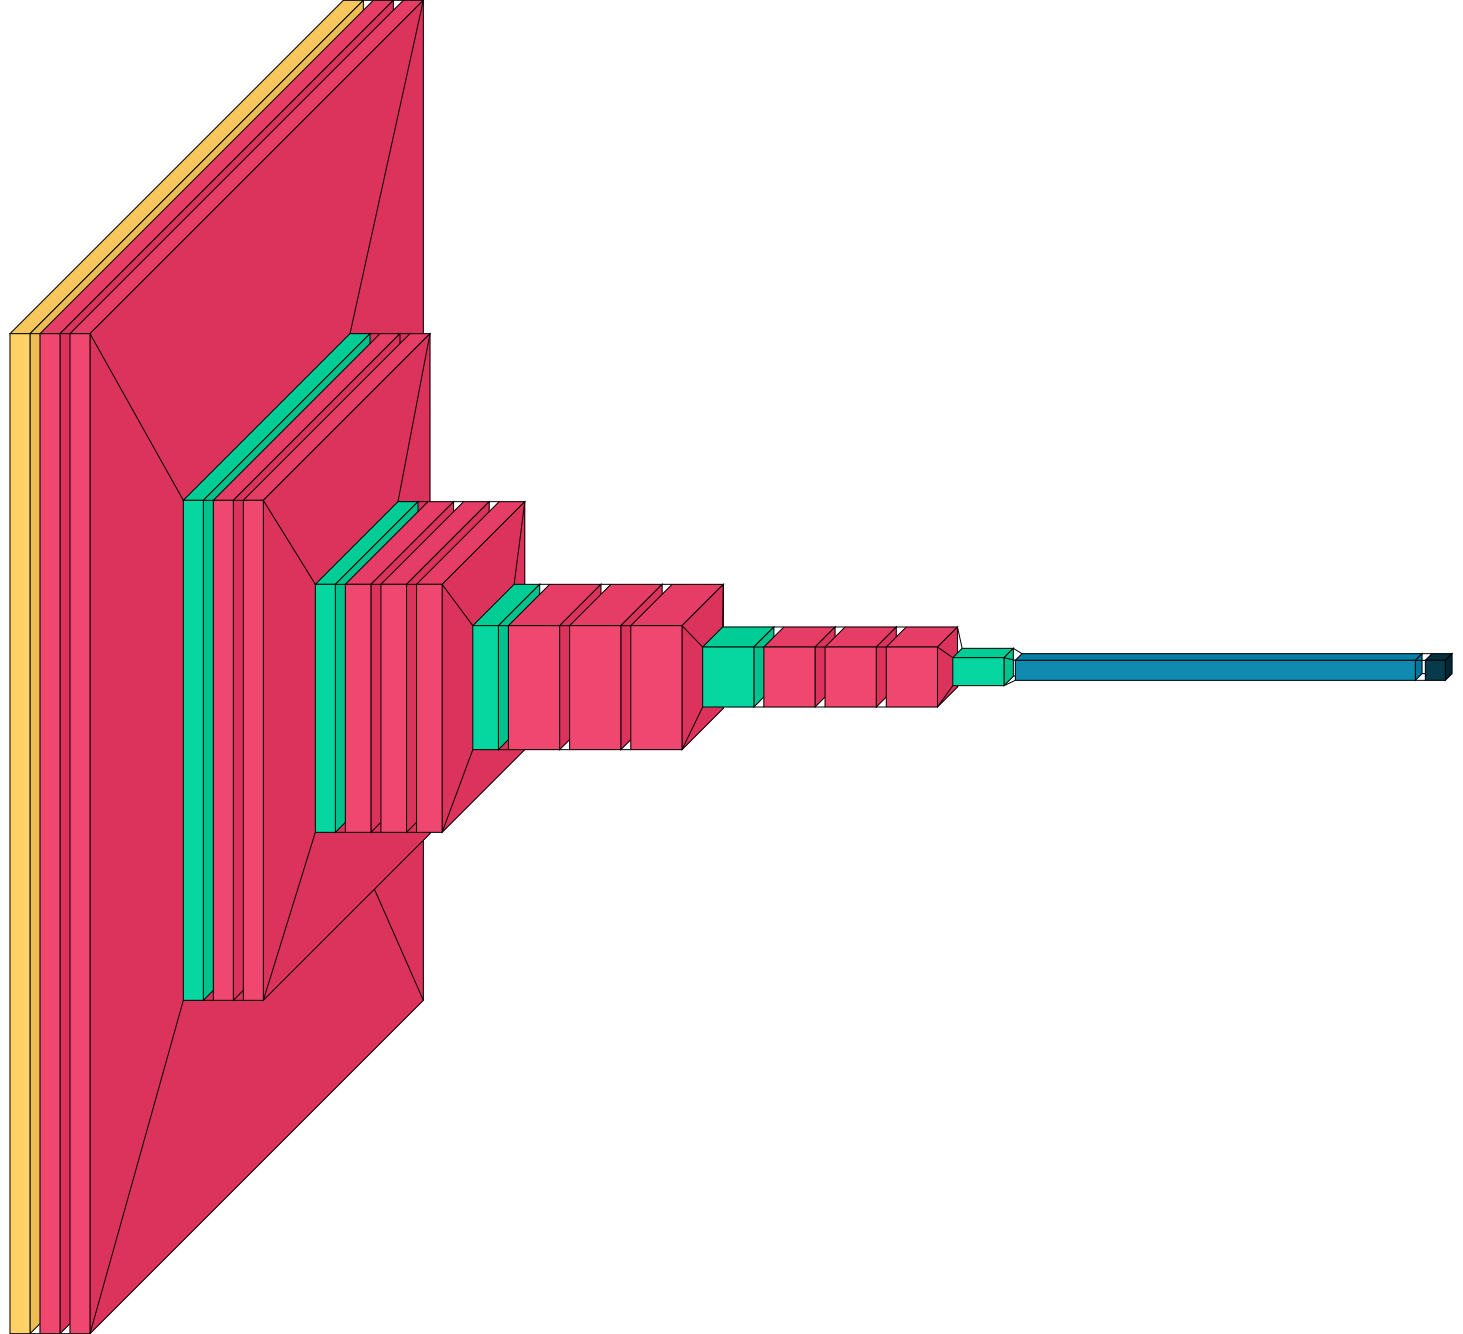

In [71]:
import visualkeras
visualkeras.layered_view(model2)

In [56]:
# Fit
history1 = model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10,batch_size = 30,
                    shuffle=True)

Epoch 1/10
39/39 [==============================] - 178s 5s/step - loss: 1.3804 - accuracy: 0.4402 - val_loss: 1.0212 - val_accuracy: 0.4810
Epoch 2/10
39/39 [==============================] - 166s 4s/step - loss: 0.6705 - accuracy: 0.7179 - val_loss: 1.1747 - val_accuracy: 0.5048
Epoch 3/10
39/39 [==============================] - 178s 5s/step - loss: 0.4932 - accuracy: 0.8291 - val_loss: 1.1517 - val_accuracy: 0.4714
Epoch 4/10
39/39 [==============================] - 179s 5s/step - loss: 0.3984 - accuracy: 0.8650 - val_loss: 1.1792 - val_accuracy: 0.5381
Epoch 5/10
39/39 [==============================] - 184s 5s/step - loss: 0.3089 - accuracy: 0.9103 - val_loss: 1.2224 - val_accuracy: 0.4857
Epoch 6/10
39/39 [==============================] - 182s 5s/step - loss: 0.2794 - accuracy: 0.9256 - val_loss: 1.2303 - val_accuracy: 0.4905
Epoch 7/10
39/39 [==============================] - 183s 5s/step - loss: 0.2420 - accuracy: 0.9299 - val_loss: 1.2916 - val_accuracy: 0.5095
Epoch 8/10
39

In [57]:
#x
# Fit
history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10,batch_size = 30,
                    shuffle=True)

Epoch 1/10
39/39 [==============================] - 145s 4s/step - loss: 1.2092 - accuracy: 0.4726 - val_loss: 1.0625 - val_accuracy: 0.5286
Epoch 2/10
39/39 [==============================] - 141s 4s/step - loss: 0.6285 - accuracy: 0.7316 - val_loss: 1.0456 - val_accuracy: 0.5190
Epoch 3/10
39/39 [==============================] - 153s 4s/step - loss: 0.4692 - accuracy: 0.8239 - val_loss: 1.3328 - val_accuracy: 0.4905
Epoch 4/10
39/39 [==============================] - 173s 4s/step - loss: 0.3441 - accuracy: 0.8838 - val_loss: 1.3151 - val_accuracy: 0.4857
Epoch 5/10
39/39 [==============================] - 154s 4s/step - loss: 0.2577 - accuracy: 0.9333 - val_loss: 1.2781 - val_accuracy: 0.5286
Epoch 6/10
39/39 [==============================] - 144s 4s/step - loss: 0.2297 - accuracy: 0.9368 - val_loss: 1.3418 - val_accuracy: 0.4857
Epoch 7/10
39/39 [==============================] - 145s 4s/step - loss: 0.2203 - accuracy: 0.9342 - val_loss: 1.3241 - val_accuracy: 0.5190
Epoch 8/10
39

In [ ]:
#x
model1.save(r'D:\university\Thesis\final\Flower kath golap\saved model')

In [ ]:
#x
model2.save(r'D:\university\Thesis\final\Flower kath golap\saved model')

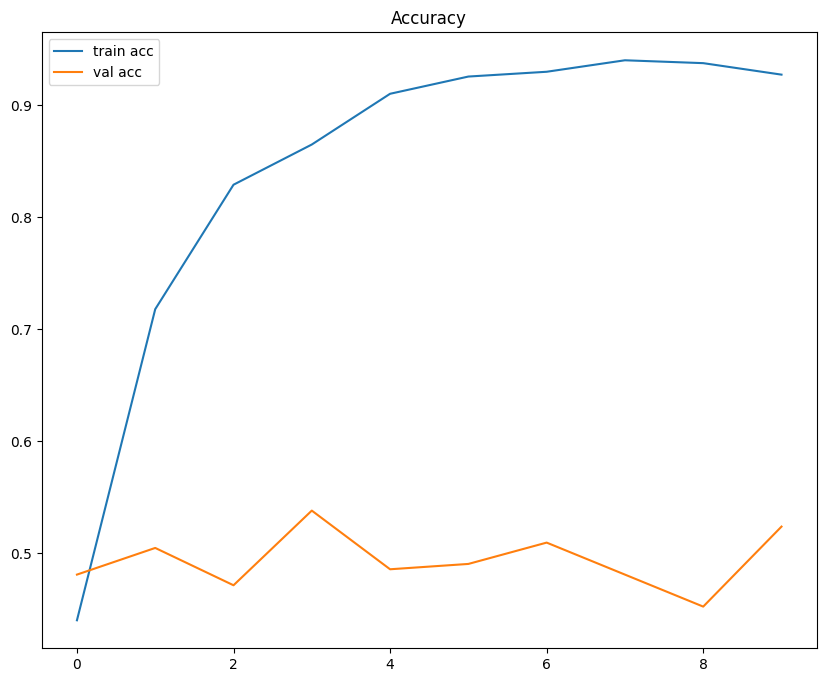

In [64]:
plt.figure(figsize=(10, 8))
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

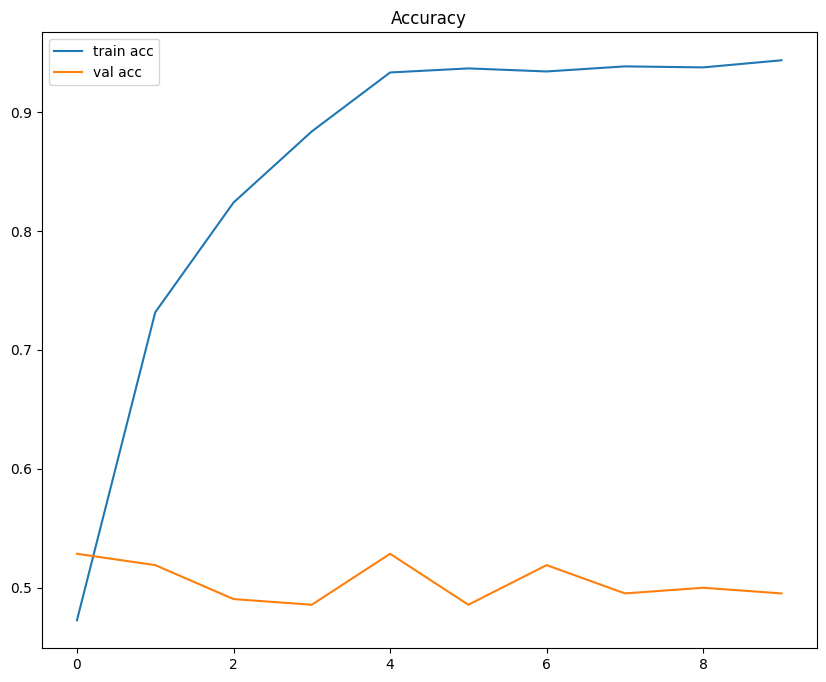

In [65]:
#X
plt.figure(figsize=(10, 8))
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

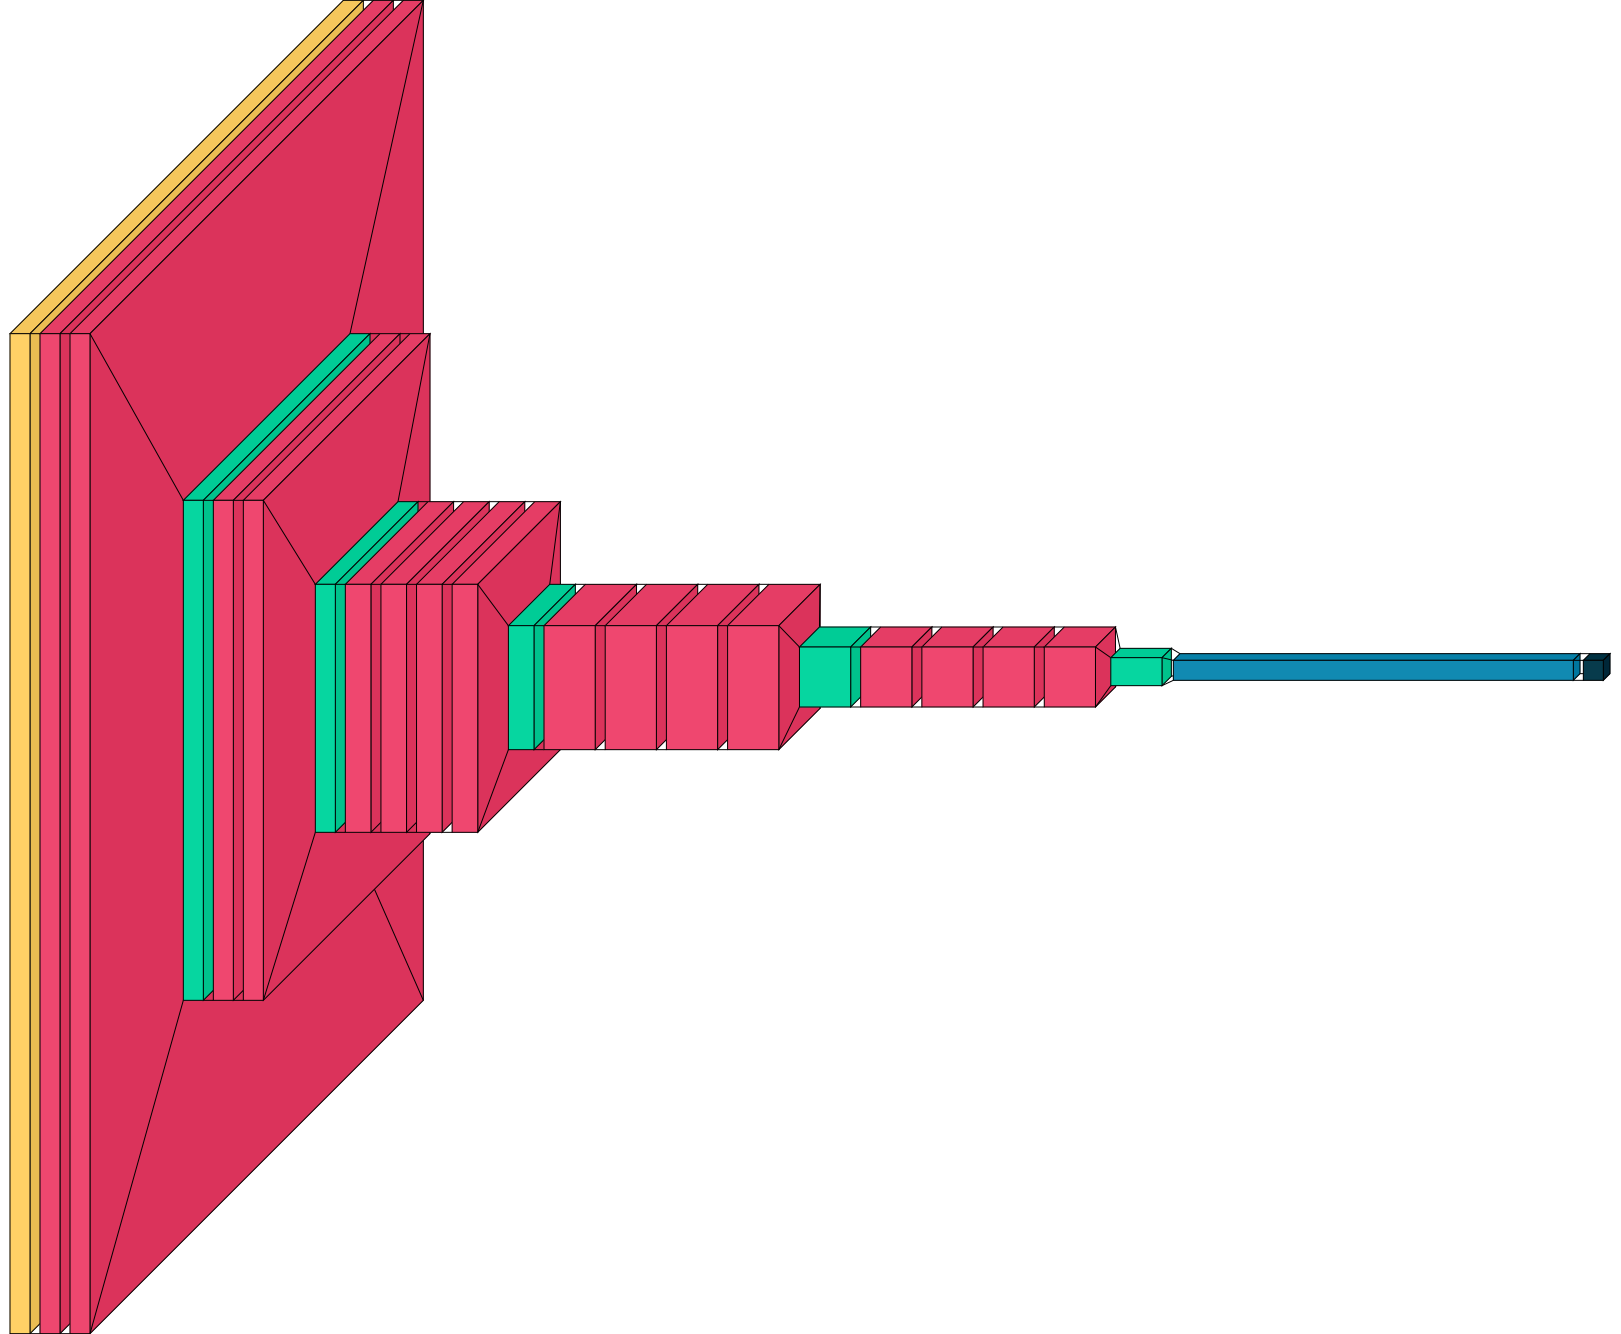